**Optimisez la gestion des données de la boutique en ligne Bottleneck avec Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Rapprochement des fichiers ERP et WEB dans un seul fichier**

+ Je commence par importer les différents fichiers dans mon Notebook.

In [2]:
erp = pd.read_csv('erp.csv')
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,7338,1,16.3,45,instock
1,7329,0,26.5,14,instock
2,7247,1,54.8,23,instock
3,7204,0,45.0,9,instock
4,7203,0,45.0,30,instock


In [3]:
# Je vérifie la taille de mon dataframe

erp.shape

(825, 5)

In [4]:
import warnings
warnings.filterwarnings('ignore')
web = pd.read_excel('web.xlsx')
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
web.shape

(1513, 28)

In [6]:
liaison = pd.read_csv('liaison.csv')
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [7]:
liaison.shape

(825, 2)

**Etape de nettoyage des fichiers**

+ J'affiche pour chaque fichier importé, le nombre de valeurs manquantes pour chacune des variables

In [8]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [9]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [10]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [11]:
# Je supprime les lignes du fichier liaison contenant des valeurs manquantes

liaison = liaison.dropna()
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


+ Je vérifie le type de chaque variable pour chacun des fichiers

In [12]:
web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [13]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [14]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

+ Vérification des doublons

In [15]:
# Je vérifie si j'ai des doublons dans les fichier erp et liaison.  
# J'utilise la variable 'product_id' qui servira de clé lors de ma jointure.

erp.loc[erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [16]:
liaison.loc[liaison.duplicated(keep=False),:]

,product_id,id_web


In [17]:
# Je vérifie maintenant si j'ai des doublons dans le fichier web

web.loc[web[['sku','post_name']].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [18]:
# Je supprime les doublons du fichier web

web.drop_duplicates(subset=['sku','post_name'], inplace=True, ignore_index=True)

+ Je supprime les lignes ne contenant que des valeurs manquantes dans le fichier web. 

In [19]:
web.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False).head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


+ Je supprime les lignes du fichier web contenant des valeurs manquantes dans la colonne 'sku' car la variable 'sku' servira de clé lors de la jointure des fichiers et sans valeur, les lignes concernées ne pourront pas être rapprochées des autres fichiers

In [20]:
web = web.dropna(subset=['sku'])
web.shape

(714, 28)

In [21]:
# Etant donné que la variable 'sku' est ma clé de jointure, je vérifie pour les 714 lignes du fichier web, 
# que toutes les valeurs de la variable 'sku' sont bien uniques 

web['sku'].nunique()

714

+ Je vérifie le contenu des variables, afin de supprimer celles qui ne contiennent que des zéros ou des valeurs manquantes

In [22]:
web['virtual'].value_counts()

0    714
Name: virtual, dtype: int64

In [23]:
web['downloadable'].value_counts()

0    714
Name: downloadable, dtype: int64

In [24]:
web['rating_count'].value_counts()

0    714
Name: rating_count, dtype: int64

In [25]:
web['average_rating'].value_counts()

0.0    714
Name: average_rating, dtype: int64

In [26]:
web['post_parent'].value_counts()

0.0    714
Name: post_parent, dtype: int64

In [27]:
web['menu_order'].value_counts()

0.0    714
Name: menu_order, dtype: int64

In [28]:
web['comment_count'].value_counts()

0.0    714
Name: comment_count, dtype: int64

In [29]:
web['post_mime_type'].value_counts()

Series([], Name: post_mime_type, dtype: int64)

In [30]:
# Je supprime les variables qui ne contiennent que des zéros ou des valeurs manquantes

web = web.drop(['virtual','downloadable','rating_count','average_rating','post_parent','menu_order','comment_count','tax_class','post_content','post_password','post_content_filtered','post_mime_type'], axis=1)
web.head(2)

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product


In [31]:
web.isnull().sum()

sku                  0
total_sales          0
tax_status           0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
guid                 0
post_type            0
dtype: int64

**Jointure des fichiers**

+ Maintenant que l'étape de nettoyage est terminée, je joins le fichier erp et le fichier liaison dans un nouveau dataframe que je nomme erp_liaison.

In [32]:
# J'effectue une jointure interne

erp_liaison = pd.merge(erp,liaison, on = 'product_id',how='inner')
erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,7338,1,16.3,45,instock,16230
1,7329,0,26.5,14,instock,14680-1
2,7247,1,54.8,23,instock,13127-1
3,7025,1,69.0,2,instock,15887
4,7023,1,27.5,15,instock,15891


In [33]:
# Je vérifie si j'ai bien le même nombre de lignes que dans le fichier liaison

erp_liaison.shape

(734, 6)

+ Puis je joins ce nouveau dataframe erp-liaison avec le dataframe web après avoir convertis ma variable sku en format chaine de caractères

In [34]:
# Je convertis ma variable sku en format chaine de caractères

web['sku'] = web['sku'].astype(str)
print(web.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 716
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   tax_status         714 non-null    object        
 3   post_author        714 non-null    float64       
 4   post_date          714 non-null    datetime64[ns]
 5   post_date_gmt      714 non-null    datetime64[ns]
 6   post_title         714 non-null    object        
 7   post_excerpt       714 non-null    object        
 8   post_status        714 non-null    object        
 9   comment_status     714 non-null    object        
 10  ping_status        714 non-null    object        
 11  post_name          714 non-null    object        
 12  post_modified      714 non-null    datetime64[ns]
 13  post_modified_gmt  714 non-null    datetime64[ns]
 14  guid      

In [35]:
# J'effectue une jointure à droite pour conserver toutes les lignes du fichier web.

new_erp = pd.merge(erp_liaison,web, left_on = 'id_web', right_on = 'sku',how='right')
new_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,total_sales,tax_status,post_author,...,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,bon-cadeau-25-euros,10.0,taxable,1.0,...,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,3847,1,24.2,0,outofstock,15298,15298,6.0,taxable,2.0,...,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,3849,1,34.3,0,outofstock,15296,15296,0.0,taxable,2.0,...,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,3850,1,20.8,0,outofstock,15300,15300,0.0,taxable,2.0,...,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,4032,1,14.1,0,outofstock,19814,19814,3.0,taxable,2.0,...,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product


In [36]:
# Je vérifie que j'ai bien toutes les lignes du fichier web

new_erp.shape

(714, 22)

>J'obtiens donc mes trois fichiers réunis en un seul fichier de 714 lignes qui contient l'ensemble des informations

**2. Calcul du chiffre d'affaire par produit et du chiffre d'affaire total réalisé en ligne**

In [37]:
# J'ajoute une colonne 'ca' dans laquelle je calcule mon chiffre d'affaire par produit et je réduis l'affichage des colonnes
# pour une meilleur lisibilité

new_erp['ca'] = new_erp['price']*new_erp['total_sales']
new_erp[['product_id','ca','price','total_sales']].head(10)

,product_id,ca,price,total_sales
0,4954,250.0,25.0,10.0
1,3847,145.2,24.2,6.0
2,3849,0.0,34.3,0.0
3,3850,0.0,20.8,0.0
4,4032,42.3,14.1,3.0
5,4039,0.0,46.0,0.0
6,4040,0.0,34.3,0.0
7,4041,0.0,32.7,0.0
8,4042,218.4,31.2,7.0
9,4043,180.0,60.0,3.0


In [38]:
# Je calcule le CA total

ca_total = new_erp['ca'].sum()
print("Le chiffre d'affaire total réalisé en ligne est de",ca_total,"€")

Le chiffre d'affaire total réalisé en ligne est de 70568.6 €


**3. Analyse sur les prix des produits**

In [39]:
# Je regarde en détail ma variable prix

new_erp['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Je choisi ensuite d'afficher la distribution des prix avec l'aide d'un graphique de type boxplot

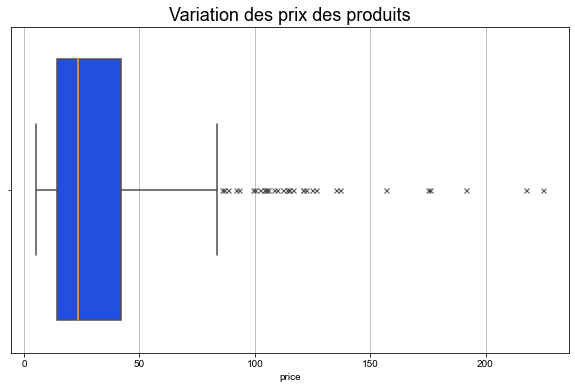

In [40]:
plt.figure(figsize = (10,6))
plt.title("Variation des prix des produits", fontsize=18)
sns.set_theme(style="ticks", palette="bright")
plt.grid(axis='x')
sns.boxplot(data=new_erp, x='price', flierprops={"marker": "x"}, medianprops={"color": "orange"})
plt.show()

Je cherche maintenant à connaître précisement les prix considérés comme aberrants et représentés par des croix sur mon boxplot, ainsi que les produits correspondants. Pour cela je vais utiliser deux méthodes différentes :

+ La méthode interquartile
+ La méthode du z-score

*Méthode interquartile IQR*

In [41]:
Q3 = round(np.quantile(new_erp['price'], 0.75),2)
Q1 = np.quantile(new_erp['price'], 0.25)
print("75% des prix se trouvent en dessous du 3ème quartile qui est représenté par Q3 =",Q3)
print("25% des prix se trouvent en dessous du 1er quartile qui est représenté par Q1 =",Q1)

75% des prix se trouvent en dessous du 3ème quartile qui est représenté par Q3 = 42.18
25% des prix se trouvent en dessous du 1er quartile qui est représenté par Q1 = 14.1


In [42]:
# Calculons maintenant l'espace interquartile IQR au sein duquel se trouvent 50% des valeurs

IQR = Q3 - Q1
print("La distance interquartile est de",IQR)

La distance interquartile est de 28.08


In [43]:
# Calculons maintenant la valeur maximale au-delà de laquelle les prix seront considérés comme aberrant car trop 
# éloignés de l'ensemble des données de prix

maximum = Q3 + 1.5 * IQR
print("La valeur maximale de notre variable prix (sans les outliers) est de",maximum,"€")

La valeur maximale de notre variable prix (sans les outliers) est de 84.3 €


In [44]:
# Maintenant nous pouvons afficher tous les prix considérés comme aberrants, c'est à dire se trouvant au-delà
# de cette valeur maximale

outliers = []
for j in new_erp['price']:
    if j > maximum:
        outliers.append(j)
print("En suivant la méthode interquartile, les différentes valeurs à priori aberrantes en ce qui concerne les prix sont", outliers)

En suivant la méthode interquartile, les différentes valeurs à priori aberrantes en ce qui concerne les prix sont [100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


In [45]:
print("La méthode interquartile me permet de trouver",len(outliers),"valeurs aberrantes, allant de",min(outliers),"à",max(outliers),"€")

La méthode interquartile me permet de trouver 32 valeurs aberrantes, allant de 85.6 à 225.0 €


*Méthode du z-score*

In [46]:
mean = round(new_erp['price'].mean(),2)
std = round(new_erp['price'].std(),2)
print("La moyenne des prix est",mean,"€")
print("L'écart type est de",std)

La moyenne des prix est 32.49 €
L'écart type est de 27.81


In [47]:
threshold = 2
outlier = []
for i in new_erp['price']:
    z = (i - mean)/std
    if z > threshold:
        outlier.append(i)
print("En utilisant la méthode du z-score, les différentes valeurs à priori aberrantes en ce qui concerne les prix sont", outlier)

En utilisant la méthode du z-score, les différentes valeurs à priori aberrantes en ce qui concerne les prix sont [100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


In [48]:
print("La méthode du z-score me permet de trouver",len(outlier),"valeurs aberrantes, allant de",min(outlier),"à",max(outlier),"€")

La méthode du z-score me permet de trouver 30 valeurs aberrantes, allant de 88.4 à 225.0 €


In [49]:
# Regardons maintenant à quels produits correspondent ces valeurs considérées comme aberrantes

produits_chers = new_erp.loc[new_erp['price'] >= maximum,['post_name','price','ca']]
produits_chers.sort_values('price',ascending=False).head(32)


,post_name,price,ca
200,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,1125.0
426,david-duband-charmes-chambertin-grand-cru-2014,217.5,0.0
587,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3,573.9
219,cognac-frapin-vip-xo,176.0,2288.0
553,camille-giroud-clos-de-vougeot-2016,175.0,0.0
222,cognac-frapin-chateau-de-fontpinot-1989-20-ans,157.0,0.0
382,domaine-des-croix-corton-charlemagne-grand-cru...,137.0,685.0
642,champagne-gosset-celebris-vintage-2007,135.0,270.0
202,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,1391.5
511,domaine-weinbach-gewurztraminer-gc-furstentum-...,124.8,0.0


>Au vu des produits concernés, le prix semble justifié. 
Il ne s'agit donc pas de valeurs aberrantes.

Poussons un peu l'analyse et regardons quel est le poids des vins les plus chers dans le CA total

In [50]:
# Calcul du CA pour les vins les plus chers

ca_produits_chers = produits_chers['ca'].sum()
print("Le chiffre d'affaire des vins les plus onéreux s'élève à",ca_produits_chers,"€")

Le chiffre d'affaire des vins les plus onéreux s'élève à 6970.0 €


In [51]:
pourcentage_ca_produits_chers = round(ca_produits_chers/ca_total*100,1)
print("Le chiffre d'affaire des vins les plus chers représente",pourcentage_ca_produits_chers,"% du chiffre d'affaire total.")

Le chiffre d'affaire des vins les plus chers représente 9.9 % du chiffre d'affaire total.


Enfin, regardons le nombre de ventes en fonction du prix des produits et le chiffre d'affaire correspondant

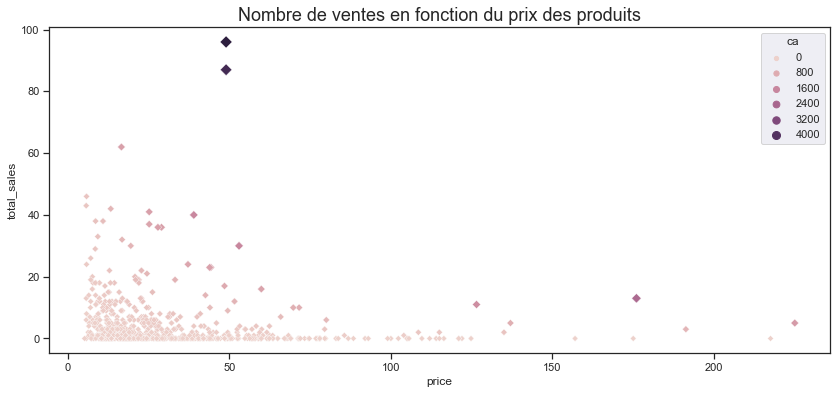

In [52]:
plt.figure(figsize = (14,6))
plt.title("Nombre de ventes en fonction du prix des produits", fontsize=18)
sns.set_theme(style="darkgrid")
sns.scatterplot(data=new_erp, x="price",y="total_sales", hue="ca", marker="D", size='ca')
plt.show()

In [53]:
# Regardons d'un peu plus près ces deux produits générant plus de 4000€ de chiffre d'affaire

plus_gros_ca = new_erp.sort_values(['ca'],ascending=False)
plus_gros_ca[['product_id','sku','price','post_name','stock_status','total_sales','stock_quantity','ca']].head(2)

,product_id,sku,price,post_name,stock_status,total_sales,stock_quantity,ca
195,4334,7818,49.0,champagne-gosset-grand-blanc-de-blanc,outofstock,96.0,0,4704.0
72,4144,1662,49.0,champagne-gosset-grand-rose,instock,87.0,11,4263.0


>On constate en regardant l'état des stocks des deux produits générant les plus gros CA, qu'il est urgent de les avoir à nouveau en stock. 